### Importing required libraries

In [1]:
# importing libraries  
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  

### Loading the dataset

In [2]:
df = pd.read_csv('User_Data.csv')

In [3]:
df.sample(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
302,15720745,Female,37,137000,1
215,15779529,Female,60,108000,1
329,15639576,Female,47,107000,1
261,15680587,Male,36,144000,1
214,15622478,Male,47,43000,0


### Droping User Id Column

In [4]:
df.drop('User ID',axis=1,inplace=True)

In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Renaming the column

In [6]:
df.rename(columns={'EstimatedSalary':'Salary'},inplace=True)

In [7]:
df.head()

,Gender,Age,Salary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


### Handling Categorical variable

In [8]:
gender = pd.get_dummies(df['Gender'],drop_first=True)

In [9]:
gender.head()

,Male
0,True
1,True
2,False
3,False
4,True


### Merging the Dataset

In [10]:
df = pd.concat([df,gender],axis=1)

In [11]:
df.head()

,Gender,Age,Salary,Purchased,Male
0,Male,19,19000,0,True
1,Male,35,20000,0,True
2,Female,26,43000,0,False
3,Female,27,57000,0,False
4,Male,19,76000,0,True


### Drop the gender categorical Column

In [12]:
df.drop('Gender',axis=1,inplace=True)

In [13]:
df.rename(columns={'Male':'Gender'},inplace=True)
df.head()

,Age,Salary,Purchased,Gender
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


### Reordering the Columns

In [14]:
new_order = ['Gender','Age','Salary','Purchased']
df = df[new_order]

### Dependent and Independent variable

In [15]:
# independent variables x=df[['Gender','Age','Salary']]
# independent variables  y=df[['Purchased']]

x = df.iloc[:,0:3].values # independent variables
y = df.iloc[:,3].values # dependent variable or the output

In [17]:
x.shape

(400, 3)

In [16]:
y.shape

(400,)

### Splitting the Dataset

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=0)

In [18]:
x_train.shape

NameError: name 'x_train' is not defined

In [21]:
x_test.shape

(100, 3)

In [22]:
y_train.shape

(300,)

In [23]:
y_test.shape

(100,)

### Scalling Dataset

In [24]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
x_train = st.fit_transform(x_train)
x_test = st.fit_transform(x_test)

In [19]:
x_train.shape

(300, 3)

In [ ]:
print(x_train)

### Fitting Decission Tree to the training set

In [35]:
#Fitting Decision Tree classifier to the training set
from sklearn.tree import DecisionTreeClassifier  

# Create a DecisionTreeClassifier object with the following parameters:
# - criterion: It defines the function to measure the quality of a split. 
#   Here, 'entropy' is used, which measures the information gain based on entropy.
# - splitter: It specifies the strategy used to choose the split at each node. 
#   'best' means the best split is chosen based on the criterion specified.
# - max_depth: It limits the maximum depth of the tree. 
#   This parameter helps control overfitting. Here, the maximum depth is set to 10.
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=12, random_state=0)  

model.fit(x_train, y_train)  

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

### Performance of the model on Training Dataset

In [36]:
y_pred_train = model.predict(x_train)

In [27]:
y_pred_train.shape

(300,)

In [37]:
from sklearn.metrics import confusion_matrix,classification_report
cm_train = confusion_matrix(y_pred_train,y_train)
print("Confussion matrics Result:\n",cm_train)

Confussion matrics Result:
 [[189   0]
 [  0 111]]


### Classification Report Train Data

In [38]:
print("\nClassification Report:")
print(classification_report(y_pred_train, y_pred_train))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       189
           1       1.00      1.00      1.00       111

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



### Prediction on Test Data

In [39]:
y_pred_test = model.predict(x_test)
y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1], dtype=int64)

### Performance of the model on Test Dataset

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
cm_test = confusion_matrix(y_pred_test,y_test)
print("Confussion matrics Result:\n",cm_test)

Confussion matrics Result:
 [[63  4]
 [ 5 28]]


### Classification Report Test Data

In [41]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93        68
           1       0.85      0.88      0.86        32

    accuracy                           0.91       100
   macro avg       0.89      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



<Axes: >

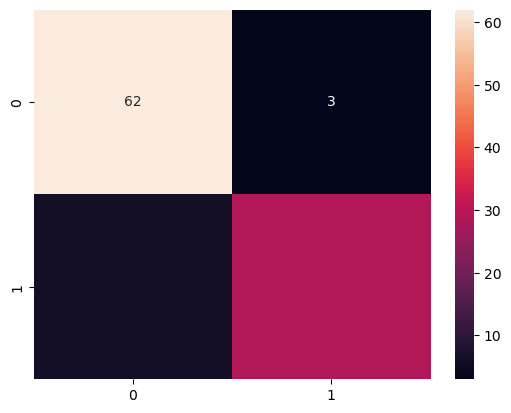

In [33]:
import matplotlib.pyplot as plt # there is some thing to plot
%matplotlib inline
import seaborn as sns #  EDA 

sns.heatmap(cm_test,annot=True)

## Generating the tree

DecisionTreeClassifier(criterion='entropy', max_depth=12, random_state=0)

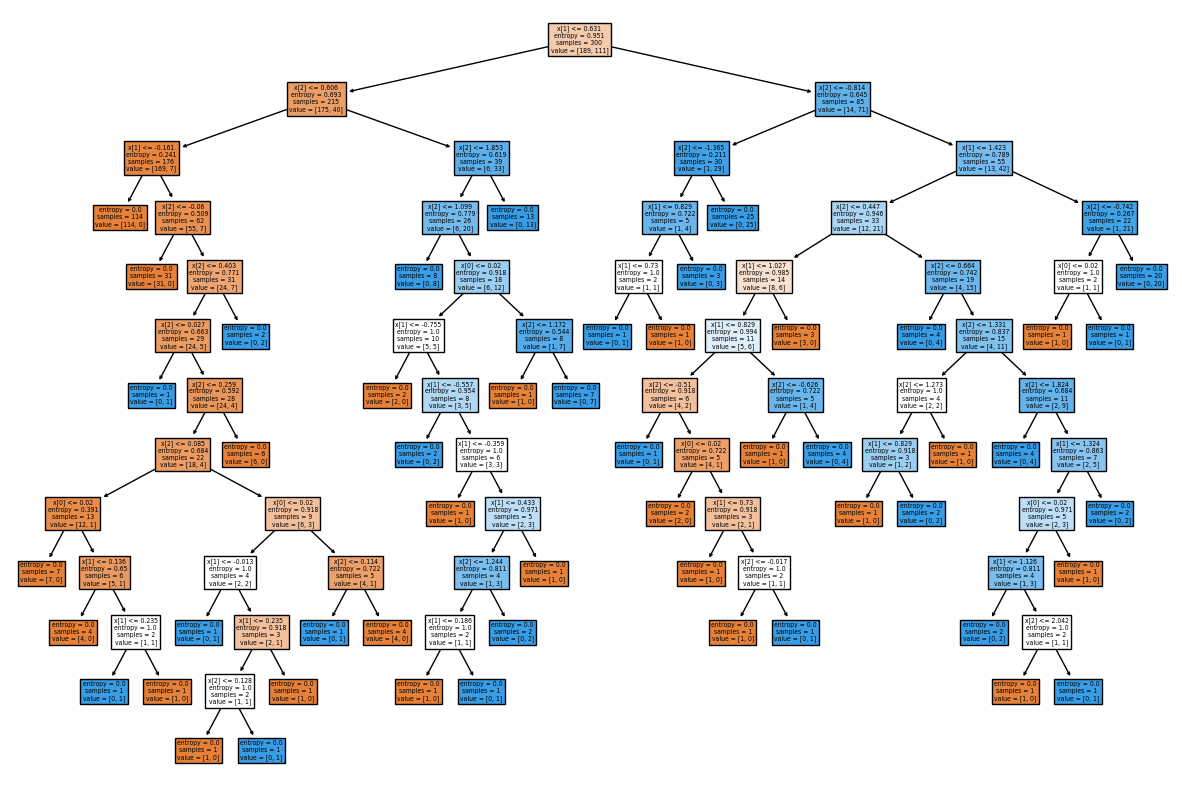

In [42]:
## Generating a tree
# Importing the tree module from the scikit-learn library
from sklearn import tree  
# Importing the pyplot module from the matplotlib library
import matplotlib.pyplot as plt  
# Setting the size of the figure to (15, 10), in inches
plt.figure(figsize=(15,10))  
# Plotting the decision tree stored in the 'model' object, with filled nodes
tree.plot_tree(model, filled=True)  
model